# **International Cosmetic Brands**

***Objective Statement:***

The objective of this study is to conduct aspect-based sentiment analysis on international cosmetic brands' products using Natural Language Processing (NLP) techniques to evaluate the prevalence of neutral emotional components in customer reviews and feedback.


***Analytical Study Question:***

*How can advanced predictive models in Natural Language Processing (NLP) be refined to enhance the accuracy and reliability of sentiment analysis for international cosmetic brands' products, considering the intricate relationship between diverse emotional components in customer reviews? Can a systematic process, encompassing NLP techniques, exploratory data analysis, mathematical insights, and data visualization be leveraged to optimize decision-making and predictive accuracy in NLP applications within the cosmetics industry?*

**Components of the Dataset**

•	***Label:*** A unique primary key identifier for each product entry where it’s classified into different product types.

•	***Brand:*** Represents the categorical variables indicating the manufacturer of the product.

•	***Name:*** A descriptive text field containing the product's full name.

•	***Price:*** A numerical variable representing the product's cost in units (No specific currency).

•	***Rank:*** A numerical variable representing the product's popularity, potentially based on sales or user ratings.

•	***Ingredient:*** A text field containing a list of ingredients used in the product's formulation.

•	***Combination:*** A binary variable indicating the type of ingredient combination, such as natural or synthetic for each product name.

•	***Dry:*** A binary variable indicating whether the product is specifically formulated for dry skin types for each product name.

•	***Normal:*** A binary variable indicating whether the product is suitable for normal skin type according to each product.

•	***Oily:*** A binary variable indicating whether the product is suitable for oily skin types according to each product.

•	***Sensitive:*** A binary variable indicating whether the product is suitable for sensitive skin types according to each product.


**Accomplished:**

***Data Collection:*** Gather data related to beauty products from major cosmetics firms. This data may include product descriptions, customer reviews, and other textual information.

***Loading dataset:*** Determining the relevant sources of data that align with the analysis objectives. Establishing connections to the data sources and obtaining permission to access the data. Retrieving the data from the sources and storing it in a local or accessible location.

***Data pre-processin***g: Ensuring the data is consistent in terms of structure, values, and data types and addressing any missing or incomplete values in the dataset.

***Text cleaning:*** This involves several actions such as removing urls, mentions/ @, https, removing stop words from the review content, removing words with only 2 characters and removing numbers and also lemmatization.

***Visualization:*** Creating visualizations or reports to present the findings effectively.

***Sentiment Analysis:*** This is to determine the sentiment or emotional tone associated with each aspect which involves classifying text as positive, negative, or neutral sentiment.

***Aspect-Based Analysis:*** This assesses the sentiment of reviews or comments related to the fragrance of the beauty products.

***Result Interpretation:*** To understand the overall sentiment and relevance of emotional components in beauty products.


In [ ]:
#General imports

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os           #provides easy functions that allow us to interact and get Operating System information and even control processes up to a limit
import re           #the functions in this module let you check if a particular string matches a given regular expression
import torch        #provides two high-level features: Tensor computation and deep neural network
import sqlite3      #provides a lightweight disk-based database that doesn't require a separate server process
import matplotlib.pyplot as plt  #plotting
import plotly.express as px
import seaborn as sns  #plotting
%matplotlib inline

In [ ]:
#NLP processing imports
from wordcloud import WordCloud     #helps us to know the frequency of a word in textual content using visualization
import nltk                         #used for NLP
import string
from nltk.corpus import stopwords   #defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
# Initialize the Porter Stemmer
stemmer = PorterStemmer()
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import spacy                        #free open-source library for Natural Language Processing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import spacy

In [ ]:
###Vader Sentiment
#To install vaderSentiment
!pip install vaderSentiment               #VADER is a lexicon and rule-based feeling analysis instrument
from vaderSentiment import vaderSentiment
from textblob import TextBlob             #library for processing textual data
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
####Lemmatization
from nltk.stem import WordNetLemmatizer
# Lemmatize with POS Tag
from nltk.corpus import wordnet

In [ ]:
os.getcwd()     #returns current working directory of a process

'/content'

# **Exploratory Data Analysis (EDA)**
**Loading dataset**

In [ ]:
# Read the CSV file while skipping lines with errors
file_path = '/content/final makeup.xlsx'

cos_rev = pd.read_excel('/content/final makeup.xlsx')   #loading dataset


In [ ]:
cos_rev.head()    #displays first 5 rows from top of dataset

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [ ]:
cos_rev.tail()     #displays last 5 rows from the bottom of dataset

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
1442,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1443,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1444,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1445,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0
1446,Sun protect,DERMAFLASH,DERMAPROTECT Daily Defense Broad Spectrum SPF 50+,45,0.0,Visit the DERMAFLASH boutique,1,1,1,1,1


 **Data pre-processing**

In [ ]:
cos_rev.describe().T   #summary of dataset

,count,mean,std,min,25%,50%,75%,max
Price,1447.0,55.671735,45.103516,3.0,30.0,43.0,68.0,370.0
Rank,1447.0,4.156807,0.621264,0.0,4.0,4.3,4.5,5.0
Combination,1447.0,0.654457,0.475709,0.0,0.0,1.0,1.0,1.0
Dry,1447.0,0.613683,0.487073,0.0,0.0,1.0,1.0,1.0
Normal,1447.0,0.650311,0.477037,0.0,0.0,1.0,1.0,1.0
Oily,1447.0,0.606082,0.488786,0.0,0.0,1.0,1.0,1.0
Sensitive,1447.0,0.514167,0.499972,0.0,0.0,1.0,1.0,1.0


In [ ]:
nRow, nCol = cos_rev.shape       #returns dimensions of the dataset
print(f'There are {nRow} rows and {nCol} columns')

There are 1447 rows and 11 columns


In [ ]:
cos_rev.info()        #to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1447 non-null   object 
 1   Brand        1447 non-null   object 
 2   Name         1446 non-null   object 
 3   Price        1447 non-null   int64  
 4   Rank         1447 non-null   float64
 5   Ingredients  1447 non-null   object 
 6   Combination  1447 non-null   int64  
 7   Dry          1447 non-null   int64  
 8   Normal       1447 non-null   int64  
 9   Oily         1447 non-null   int64  
 10  Sensitive    1447 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 124.5+ KB


In [ ]:
#DataTypes
cos_rev.dtypes     #returns the types of variables in the dataset

Label           object
Brand           object
Name            object
Price            int64
Rank           float64
Ingredients     object
Combination      int64
Dry              int64
Normal           int64
Oily             int64
Sensitive        int64
dtype: object

In [ ]:
cos_rev.isnull().sum() #checking missing value

Label          0
Brand          0
Name           1
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [ ]:
cos_rev.dropna(inplace=True, axis=0)   #treating missing value
cos_rev.info()                         #to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1446
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1446 non-null   object 
 1   Brand        1446 non-null   object 
 2   Name         1446 non-null   object 
 3   Price        1446 non-null   int64  
 4   Rank         1446 non-null   float64
 5   Ingredients  1446 non-null   object 
 6   Combination  1446 non-null   int64  
 7   Dry          1446 non-null   int64  
 8   Normal       1446 non-null   int64  
 9   Oily         1446 non-null   int64  
 10  Sensitive    1446 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 135.6+ KB


In [ ]:
cos_rev.isnull().sum() #checking missing value

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [ ]:
cos_rev["Ingredients"] = cos_rev["Ingredients"].astype(str)  #converting Ingredients datatype from object to string datatype

In [ ]:
cos_rev['Brand'].unique()   #returns unique values in the Brand column

array(['LA MER', 'SK-II', 'DRUNK ELEPHANT', 'IT COSMETICS', 'TATCHA',
       "KIEHL'S SINCE 1851", 'FRESH', 'BELIF', 'SUNDAY RILEY', 'FARMACY',
       'FIRST AID BEAUTY', 'CLINIQUE', 'BAREMINERALS', 'SHISEIDO',
       'CHARLOTTE TILBURY', 'ORIGINS', 'OLEHENRIKSEN', 'JOSIE MARAN',
       'FARSÁLI', 'LANEIGE', 'GLOW RECIPE', 'HERBIVORE', 'TARTE',
       'CAUDALIE', 'YOUTH TO THE PEOPLE', 'BIOSSANCE', 'ESTÉE LAUDER',
       'SON & PARK', 'AMOREPACIFIC', 'BOBBI BROWN', 'DR. JART+',
       'ERBORIAN', 'SMASHBOX', 'GLAMGLOW', 'PETER THOMAS ROTH',
       'JACK BLACK', 'PHILOSOPHY', 'PERRICONE MD', 'LANCÔME', 'ALGENIST',
       'MAKE UP FOR EVER', 'KORRES', 'MURAD', 'GUERLAIN', 'KORA ORGANICS',
       'DR. DENNIS GROSS SKINCARE', 'REN CLEAN SKINCARE', 'DIOR',
       'KOPARI', 'CLARINS', 'NURSE JAMIE', 'LANCER', "L'OCCITANE",
       'KATE SOMERVILLE', 'SUPERGOOP!', 'SATURDAY SKIN',
       'SEPHORA COLLECTION', 'MILK MAKEUP', 'DR. BRANDT SKINCARE',
       'J.ONE', 'KAT VON D', 'TATA HARPER', 'GO

In [ ]:
Brand = np.array(['LA MER', 'SK-II', 'DRUNK ELEPHANT', 'IT COSMETICS', 'TATCHA',
       "KIEHL'S SINCE 1851", 'FRESH', 'BELIF', 'SUNDAY RILEY', 'FARMACY',
       'FIRST AID BEAUTY', 'CLINIQUE', 'BAREMINERALS', 'SHISEIDO',
       'CHARLOTTE TILBURY', 'ORIGINS', 'OLEHENRIKSEN', 'JOSIE MARAN',
       'FARSÁLI', 'LANEIGE', 'GLOW RECIPE', 'HERBIVORE', 'TARTE',
       'CAUDALIE', 'YOUTH TO THE PEOPLE', 'BIOSSANCE', 'ESTÉE LAUDER',
       'SON & PARK', 'AMOREPACIFIC', 'BOBBI BROWN', 'DR. JART+',
       'ERBORIAN', 'SMASHBOX', 'GLAMGLOW', 'PETER THOMAS ROTH',
       'JACK BLACK', 'PHILOSOPHY', 'PERRICONE MD', 'LANCÔME', 'ALGENIST',
       'MAKE UP FOR EVER', 'KORRES', 'MURAD', 'GUERLAIN', 'KORA ORGANICS',
       'DR. DENNIS GROSS SKINCARE', 'REN CLEAN SKINCARE', 'DIOR',
       'KOPARI', 'CLARINS', 'NURSE JAMIE', 'LANCER', "L'OCCITANE",
       'KATE SOMERVILLE', 'SUPERGOOP!', 'SATURDAY SKIN',
       'SEPHORA COLLECTION', 'MILK MAKEUP', 'DR. BRANDT SKINCARE',
       'J.ONE', 'KAT VON D', 'TATA HARPER', 'GO-TO', 'BOSCIA', 'EVE LOM',
       'MAKEUP ERASER', 'LAURA MERCIER', 'NEOGEN DERMALOGY', 'INDIE LEE',
       'KOH GEN DO', 'VOLITION BEAUTY', 'TOO FACED',
       'SKIN INC SUPPLEMENT BAR', 'NUFACE', 'KLORANE', 'BEAUTYBIO',
       'NARS', 'BLITHE', 'ERNO LASZLO', 'CLARISONIC',
       'FENTY BEAUTY BY RIHANNA', 'DERMADOCTOR', 'PEACE OUT', 'BIOEFFECT',
       'BECCA', 'COVER FX', 'MOON JUICE', 'PRIVATE DOCTOR',
       'HUM NUTRITION', 'FOREO', 'LIGHTSTIM', 'COOLA', 'OMOROVICZA',
       'SUMMER FRIDAYS', 'SAND & SKY', 'TOO COOL FOR SCHOOL',
       'DR ROEBUCK’S', 'SKIN LAUNDRY', 'ANTHONY',
       'ST. TROPEZ TANNING ESSENTIALS', 'NATURALLY SERIOUS',
       'WANDER BEAUTY', 'EDIBLE BEAUTY', 'YVES SAINT LAURENT', 'KENZOKI',
       'APIVITA', 'ILIA', 'MDSOLARSCIENCES', 'MOROCCANOIL', 'TOM FORD',
       'KAPLAN MD', 'CANE + AUSTIN', 'BLACK UP', 'VITA LIBERATA',
       'URBAN DECAY', 'DERMAFLASH'])

# Select the first twenty brands (0 to 19)
selected_brand = Brand[:20]

# Display the selected brands
print(selected_brand)

['LA MER' 'SK-II' 'DRUNK ELEPHANT' 'IT COSMETICS' 'TATCHA'
 "KIEHL'S SINCE 1851" 'FRESH' 'BELIF' 'SUNDAY RILEY' 'FARMACY'
 'FIRST AID BEAUTY' 'CLINIQUE' 'BAREMINERALS' 'SHISEIDO'
 'CHARLOTTE TILBURY' 'ORIGINS' 'OLEHENRIKSEN' 'JOSIE MARAN' 'FARSÁLI'
 'LANEIGE']


***Inference:*** For the study we are considering first 20 brands of cosmetic products available in the International market*

In [ ]:
cos_rev['Rank'].unique()  #returns the Rank value for the products

array([4.1, 4.4, 3.8, 4.2, 5. , 4.3, 4.5, 4.6, 3.9, 4. , 3.7, 4.8, 4.7,
       0. , 3.3, 3.6, 3.5, 4.9, 3.4, 2.8, 2. , 3.1, 2.6, 3. , 3.2, 2.9,
       2.7, 1.8, 1. ])

In [ ]:
Rank = np.array([4.1, 4.4, 3.8, 4.2, 5. , 4.3, 4.5, 4.6, 3.9, 4. , 3.7, 4.8, 4.7,
       0. , 3.3, 3.6, 3.5, 4.9, 3.4, 2.8, 2. , 3.1, 2.6, 3. , 3.2, 2.9,
       2.7, 1.8, 1. ])

# Select the first twenty brands (0 to 19)
selected_rank = Rank[:20]

# Display the selected brands
print(selected_rank)

[4.1 4.4 3.8 4.2 5.  4.3 4.5 4.6 3.9 4.  3.7 4.8 4.7 0.  3.3 3.6 3.5 4.9
 3.4 2.8]


***Inference:*** The products are rated from 1 star to 5 stars, 1 star being the least liked and 5 stars being the most liked*

In [ ]:
cosmetic = {'Brand': ['LA MER','SK-II','DRUNK ELEPHANT','IT COSMETICS','TATCHA',
 "KIEHL'S SINCE 1851",'FRESH','BELIF','SUNDAY RILEY','FARMACY',
 'FIRST AID BEAUTY','CLINIQUE','BAREMINERALS','SHISEIDO',
 'CHARLOTTE TILBURY','ORIGINS','OLEHENRIKSEN','JOSIE MARAN','FARSÁLI',
 'LANEIGE'],
        'Rank': [4.1, 4.4, 3.8, 4.2, 5., 4.3, 4.5, 4.6, 3.9, 4., 3.7, 4.8, 4.7, 0., 3.3, 3.6, 3.5, 4.9,
 3.4, 2.8]}

# Create a DataFrame
cosdf = pd.DataFrame(cosmetic)

# Find the brand with the highest rank
highest_rank_brand = cosdf[cosdf['Rank'] == cosdf['Rank'].max()]['Brand'].values[0]

print("Brand with the highest rank:", highest_rank_brand)


Brand with the highest rank: TATCHA


In [ ]:
# Find the index of the highest rank
highest_rank_index = np.argmax(cosdf['Rank'])

# Get the brand with the highest rank and its rank value
highest_rank_brand = cosdf['Brand'][highest_rank_index]
highest_rank_value = cosdf['Rank'][highest_rank_index]

print("Brand with the highest rank:", highest_rank_brand)
print("Highest rank value:", highest_rank_value)

Brand with the highest rank: TATCHA
Highest rank value: 5.0


In [ ]:
cosmetic = {'Brand': ['LA MER','SK-II','DRUNK ELEPHANT','IT COSMETICS','TATCHA',
 "KIEHL'S SINCE 1851",'FRESH','BELIF','SUNDAY RILEY','FARMACY',
 'FIRST AID BEAUTY','CLINIQUE','BAREMINERALS','SHISEIDO',
 'CHARLOTTE TILBURY','ORIGINS','OLEHENRIKSEN','JOSIE MARAN','FARSÁLI',
 'LANEIGE'],
        'Rank': [4.1, 4.4, 3.8, 4.2, 5., 4.3, 4.5, 4.6, 3.9, 4., 3.7, 4.8, 4.7, 0., 3.3, 3.6, 3.5, 4.9,
 3.4, 2.8]}

# Create a DataFrame
cosdf = pd.DataFrame(cosmetic)

# Find the brand with the highest rank
lowest_rank_brand = cosdf[cosdf['Rank'] == cosdf['Rank'].min()]['Brand'].values[0]

print("Brand with the lowest rank:", lowest_rank_brand)

Brand with the lowest rank: SHISEIDO


In [ ]:
# Find the index of the lowest rank
lowest_rank_index = np.argmin(cosdf['Rank'])

# Get the brand with the highest rank and its rank value
lowest_rank_brand = cosdf['Brand'][lowest_rank_index]
lowest_rank_value = cosdf['Rank'][lowest_rank_index]

print("Brand with the lowest rank:", lowest_rank_brand)
print("lowest rank value:", lowest_rank_value)

Brand with the lowest rank: SHISEIDO
lowest rank value: 0.0


In [ ]:
cosmetic = {'Brand': ['LA MER', 'SK-II', 'DRUNK ELEPHANT', 'IT COSMETICS', 'TATCHA',
                      "KIEHL'S SINCE 1851", 'FRESH', 'BELIF', 'SUNDAY RILEY', 'FARMACY',
                      'FIRST AID BEAUTY', 'CLINIQUE', 'BAREMINERALS', 'SHISEIDO',
                      'CHARLOTTE TILBURY', 'ORIGINS', 'OLEHENRIKSEN', 'JOSIE MARAN', 'FARSÁLI', 'LANEIGE'],
            'Rank': [4.1, 4.4, 3.8, 4.2, 5., 4.3, 4.5, 4.6, 3.9, 4., 3.7, 4.8, 4.7, 0., 3.3, 3.6, 3.5, 4.9, 3.4, 2.8]}

# Create a DataFrame
cosdf = pd.DataFrame(cosmetic)

# Sort the DataFrame by Rank in descending order
cosdf = cosdf.sort_values(by='Rank', ascending=False)

# Reset the index to maintain order
cosdf.reset_index(drop=True, inplace=True)

# Now, you can access the ranks associated with each brand
brands = cosdf['Brand']
ranks = cosdf['Rank']

# Display the brands and their ranks
for brand, rank in zip(brands, ranks):
    print(f"Brand: {brand}, Rank: {rank}")


Brand: TATCHA, Rank: 5.0
Brand: JOSIE MARAN, Rank: 4.9
Brand: CLINIQUE, Rank: 4.8
Brand: BAREMINERALS, Rank: 4.7
Brand: BELIF, Rank: 4.6
Brand: FRESH, Rank: 4.5
Brand: SK-II, Rank: 4.4
Brand: KIEHL'S SINCE 1851, Rank: 4.3
Brand: IT COSMETICS, Rank: 4.2
Brand: LA MER, Rank: 4.1
Brand: FARMACY, Rank: 4.0
Brand: SUNDAY RILEY, Rank: 3.9
Brand: DRUNK ELEPHANT, Rank: 3.8
Brand: FIRST AID BEAUTY, Rank: 3.7
Brand: ORIGINS, Rank: 3.6
Brand: OLEHENRIKSEN, Rank: 3.5
Brand: FARSÁLI, Rank: 3.4
Brand: CHARLOTTE TILBURY, Rank: 3.3
Brand: LANEIGE, Rank: 2.8
Brand: SHISEIDO, Rank: 0.0


***Inference:*** Representing the first 20 brand with their Rank Values.

---



In [ ]:
cosdf.head(20)

,Brand,Rank
0,TATCHA,5.0
1,JOSIE MARAN,4.9
2,CLINIQUE,4.8
3,BAREMINERALS,4.7
4,BELIF,4.6
5,FRESH,4.5
6,SK-II,4.4
7,KIEHL'S SINCE 1851,4.3
8,IT COSMETICS,4.2
9,LA MER,4.1


# **Text cleaning**

In [ ]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
cos_rev["Ingredients"] = cos_rev["Ingredients"].apply(clean)
cos_rev["Brand"] = cos_rev["Brand"].apply(clean)

**1. Removing URLs, mentions/ @, https**

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', text)

In [ ]:
cos_rev["text"] = cos_rev["Ingredients"].apply(lambda text: remove_urls(text))

In [ ]:
cos_rev.head(20)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,text
0,Moisturizer,la mer,Crème de la Mer,175,4.1,alga seaw extract miner oil petrolatum glyceri...,1,1,1,1,1,alga seaw extract miner oil petrolatum glyceri...
1,Moisturizer,skii,Facial Treatment Essence,179,4.1,galactomyc ferment filtrat pitera butylen glyc...,1,1,1,1,1,galactomyc ferment filtrat pitera butylen glyc...
2,Moisturizer,drunk eleph,Protini™ Polypeptide Cream,68,4.4,water dicaprylyl carbon glycerin cetearyl alco...,1,1,1,1,0,water dicaprylyl carbon glycerin cetearyl alco...
3,Moisturizer,la mer,The Moisturizing Soft Cream,175,3.8,alga seaw extract cyclopentasiloxan petrolatum...,1,1,1,1,1,alga seaw extract cyclopentasiloxan petrolatum...
4,Moisturizer,cosmet,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,water snail secret filtrat phenyl trimethicon ...,1,1,1,1,1,water snail secret filtrat phenyl trimethicon ...
5,Moisturizer,tatcha,The Water Cream,68,4.2,water saccharomycescamellia sinensi leafclados...,1,0,1,1,1,water saccharomycescamellia sinensi leafclados...
6,Moisturizer,drunk eleph,Lala Retro™ Whipped Cream,60,4.2,water glycerin capryl capric triglycerid isopr...,1,1,1,1,0,water glycerin capryl capric triglycerid isopr...
7,Moisturizer,drunk eleph,Virgin Marula Luxury Facial Oil,72,4.4,unrefin sclerocraya birrea marula kernel oil,1,1,1,1,0,unrefin sclerocraya birrea marula kernel oil
8,Moisturizer,kiehl sinc,Ultra Facial Cream,29,4.4,water glycerin cyclohexasiloxan squalan methy...,1,1,1,1,1,water glycerin cyclohexasiloxan squalan methy...
9,Moisturizer,la mer,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,alga seaw extract miner oil petrolatum glyceri...,0,0,0,0,0,alga seaw extract miner oil petrolatum glyceri...


**2. Removing stop words from the Review content**

In [ ]:
en_stopwords = set(stopwords.words('english'))
print(f"Stop Words in English : \n{ en_stopwords}")

Stop Words in English : 
{'have', 'other', 'some', "didn't", 'all', 'mustn', 'up', 'only', 'these', 'be', 'its', 'between', 'that', 'off', 'him', 'too', 'and', 'ma', 'through', 'his', 'hers', 'yourselves', 'he', 'has', 'how', 'will', 'by', 'don', "won't", 'needn', 'isn', "you'll", 'so', "isn't", "you're", 'whom', 'been', 'after', 'during', 'before', "haven't", 'your', 'an', "shan't", 'each', 'more', 'couldn', 'to', 'further', 'here', 'there', 'should', 'what', 'into', 'ours', 'are', "shouldn't", "mustn't", "doesn't", 'haven', 'where', 'own', 'o', 'out', 'myself', 'again', 'yourself', 'my', 'does', 'you', 'was', 'any', 'hasn', 'over', 'if', 'very', 'd', 'theirs', 'shouldn', 're', 'won', 'just', 'having', 'a', 'about', 'themselves', 'yours', 'not', 'she', 'above', 'the', 'against', 'while', 'doesn', 'on', 'me', "it's", 'is', 'of', 'did', "you've", 'at', 'didn', 'which', "needn't", 'itself', 'shan', 'why', "mightn't", 'but', 'same', 'am', 'it', 'when', "couldn't", 'few', 'wasn', 'can', 'i

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text

In [ ]:
cos_rev.head(20)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,text
0,Moisturizer,la mer,Crème de la Mer,175,4.1,alga seaw extract miner oil petrolatum glyceri...,1,1,1,1,1,alga seaw extract miner oil petrolatum glyceri...
1,Moisturizer,skii,Facial Treatment Essence,179,4.1,galactomyc ferment filtrat pitera butylen glyc...,1,1,1,1,1,galactomyc ferment filtrat pitera butylen glyc...
2,Moisturizer,drunk eleph,Protini™ Polypeptide Cream,68,4.4,water dicaprylyl carbon glycerin cetearyl alco...,1,1,1,1,0,water dicaprylyl carbon glycerin cetearyl alco...
3,Moisturizer,la mer,The Moisturizing Soft Cream,175,3.8,alga seaw extract cyclopentasiloxan petrolatum...,1,1,1,1,1,alga seaw extract cyclopentasiloxan petrolatum...
4,Moisturizer,cosmet,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,water snail secret filtrat phenyl trimethicon ...,1,1,1,1,1,water snail secret filtrat phenyl trimethicon ...
5,Moisturizer,tatcha,The Water Cream,68,4.2,water saccharomycescamellia sinensi leafclados...,1,0,1,1,1,water saccharomycescamellia sinensi leafclados...
6,Moisturizer,drunk eleph,Lala Retro™ Whipped Cream,60,4.2,water glycerin capryl capric triglycerid isopr...,1,1,1,1,0,water glycerin capryl capric triglycerid isopr...
7,Moisturizer,drunk eleph,Virgin Marula Luxury Facial Oil,72,4.4,unrefin sclerocraya birrea marula kernel oil,1,1,1,1,0,unrefin sclerocraya birrea marula kernel oil
8,Moisturizer,kiehl sinc,Ultra Facial Cream,29,4.4,water glycerin cyclohexasiloxan squalan methy...,1,1,1,1,1,water glycerin cyclohexasiloxan squalan methy...
9,Moisturizer,la mer,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,alga seaw extract miner oil petrolatum glyceri...,0,0,0,0,0,alga seaw extract miner oil petrolatum glyceri...


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
cosmetic = {'Brand': ['LA MER', 'SK-II', 'DRUNK ELEPHANT', 'IT COSMETICS', 'TATCHA',
                      "KIEHL'S SINCE 1851", 'FRESH', 'BELIF', 'SUNDAY RILEY', 'FARMACY',
                      'FIRST AID BEAUTY', 'CLINIQUE', 'BAREMINERALS', 'SHISEIDO',
                      'CHARLOTTE TILBURY', 'ORIGINS', 'OLEHENRIKSEN', 'JOSIE MARAN', 'FARSÁLI', 'LANEIGE'],
            'Rank': [4.1, 4.4, 3.8, 4.2, 5., 4.3, 4.5, 4.6, 3.9, 4., 3.7, 4.8, 4.7, 0., 3.3, 3.6, 3.5, 4.9, 3.4, 2.8]}


# Define a function for word tokenization
def tokenize_words(text):
    return word_tokenize(text)

# Apply word tokenization to the 'Brand' column
cosdf['Brand_tokens'] = cosdf['Brand'].apply(tokenize_words)

# Display the DataFrame with word tokens
print(cosdf[['Brand', 'Brand_tokens']])


                 Brand              Brand_tokens
0               LA MER                 [LA, MER]
1                SK-II                   [SK-II]
2       DRUNK ELEPHANT         [DRUNK, ELEPHANT]
3         IT COSMETICS           [IT, COSMETICS]
4               TATCHA                  [TATCHA]
5   KIEHL'S SINCE 1851  [KIEHL, 'S, SINCE, 1851]
6                FRESH                   [FRESH]
7                BELIF                   [BELIF]
8         SUNDAY RILEY           [SUNDAY, RILEY]
9              FARMACY                 [FARMACY]
10    FIRST AID BEAUTY      [FIRST, AID, BEAUTY]
11            CLINIQUE                [CLINIQUE]
12        BAREMINERALS            [BAREMINERALS]
13            SHISEIDO                [SHISEIDO]
14   CHARLOTTE TILBURY      [CHARLOTTE, TILBURY]
15             ORIGINS                 [ORIGINS]
16        OLEHENRIKSEN            [OLEHENRIKSEN]
17         JOSIE MARAN            [JOSIE, MARAN]
18             FARSÁLI                 [FARSÁLI]
19             LANEI

In [ ]:
# Define stopwords
en_stopwords = set(stopwords.words('english'))

# Define a function for word tokenization and filtering stopwords
def tokenize_and_filter(text):
    word_tokens = word_tokenize(text)
    filtered_tokens = [w for w in word_tokens if not w in en_stopwords]
    return filtered_tokens

# Apply tokenization and filtering to the 'Brand' column
cosdf['Filtered_Brand'] = cosdf['Brand'].apply(tokenize_and_filter)

# Display the DataFrame with filtered brand names
print(cosdf[['Brand', 'Filtered_Brand']])

                 Brand            Filtered_Brand
0               LA MER                 [LA, MER]
1                SK-II                   [SK-II]
2       DRUNK ELEPHANT         [DRUNK, ELEPHANT]
3         IT COSMETICS           [IT, COSMETICS]
4               TATCHA                  [TATCHA]
5   KIEHL'S SINCE 1851  [KIEHL, 'S, SINCE, 1851]
6                FRESH                   [FRESH]
7                BELIF                   [BELIF]
8         SUNDAY RILEY           [SUNDAY, RILEY]
9              FARMACY                 [FARMACY]
10    FIRST AID BEAUTY      [FIRST, AID, BEAUTY]
11            CLINIQUE                [CLINIQUE]
12        BAREMINERALS            [BAREMINERALS]
13            SHISEIDO                [SHISEIDO]
14   CHARLOTTE TILBURY      [CHARLOTTE, TILBURY]
15             ORIGINS                 [ORIGINS]
16        OLEHENRIKSEN            [OLEHENRIKSEN]
17         JOSIE MARAN            [JOSIE, MARAN]
18             FARSÁLI                 [FARSÁLI]
19             LANEI

**3.** **Removing words with only 2 characters and removing numbers**

In [ ]:
# Define a function for text cleaning
def clean_text(text):
    # Tokenization
    word_tokens = word_tokenize(text)

    # Remove characters with a length less than 2
    without_single_chr = [word for word in word_tokens if len(word) > 2]

    # Remove numbers
    cleaned_text = [word for word in without_single_chr if not word.isnumeric()]

    # Join the cleaned words back into a single string
    cleaned_text = " ".join(cleaned_text)

    return cleaned_text

# Apply the 'clean_text' function to the 'Brand' column
cosdf['Cleaned_Brand'] = cosdf['Brand'].apply(clean_text)

# Display the DataFrame with the cleaned brand names
print(cosdf[['Brand', 'Cleaned_Brand']])


                 Brand      Cleaned_Brand
0               LA MER                MER
1                SK-II              SK-II
2       DRUNK ELEPHANT     DRUNK ELEPHANT
3         IT COSMETICS          COSMETICS
4               TATCHA             TATCHA
5   KIEHL'S SINCE 1851        KIEHL SINCE
6                FRESH              FRESH
7                BELIF              BELIF
8         SUNDAY RILEY       SUNDAY RILEY
9              FARMACY            FARMACY
10    FIRST AID BEAUTY   FIRST AID BEAUTY
11            CLINIQUE           CLINIQUE
12        BAREMINERALS       BAREMINERALS
13            SHISEIDO           SHISEIDO
14   CHARLOTTE TILBURY  CHARLOTTE TILBURY
15             ORIGINS            ORIGINS
16        OLEHENRIKSEN       OLEHENRIKSEN
17         JOSIE MARAN        JOSIE MARAN
18             FARSÁLI            FARSÁLI
19             LANEIGE            LANEIGE


**4.** **Lemmatization**

In [ ]:
# Download the missing resource
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
 import nltk
 nltk.download('wordnet')

def lemmatize_words(text):
  words = text.split()
  words = [lemmatizer.lemmatize(word,pos='v') for word in words]
  return ' '.join(words)
cos_rev['text'] = cos_rev['text'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Example words for lemmatization
words = ["running", "better", "flies", "cats"]

# Lemmatize the words
lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

# Display the lemmatized words
for word, lemma in zip(words, lemmatized_words):
    print(f"Word: {word}, Lemmatized: {lemma}")

Word: running, Lemmatized: run
Word: better, Lemmatized: well
Word: flies, Lemmatized: fly
Word: cats, Lemmatized: cat


In [ ]:
from nltk.stem import WordNetLemmatizer

# Define a custom lemmatization mapping
custom_lemmatization = {
    "apples": "apple",
    "happily": "happy",
    "geese": "goose",
    "mice": "mouse",
    # Add more custom mappings as needed
}

# Create a custom lemmatizer
def custom_lemmatize(word):
    return custom_lemmatization.get(word, word)

# Initialize the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Example words to lemmatize
words_to_lemmatize = ["apples", "happily", "geese", "mice", "running"]

# Lemmatize the words using the custom function
custom_lemmatized_words = [custom_lemmatize(word) for word in words_to_lemmatize]

# Lemmatize the words using the WordNetLemmatizer
wordnet_lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in words_to_lemmatize]

print("Custom Lemmatization:", custom_lemmatized_words)
print("WordNet Lemmatization:", wordnet_lemmatized_words)


# **Data Visualization**

**1.** **Using Wordcloud**

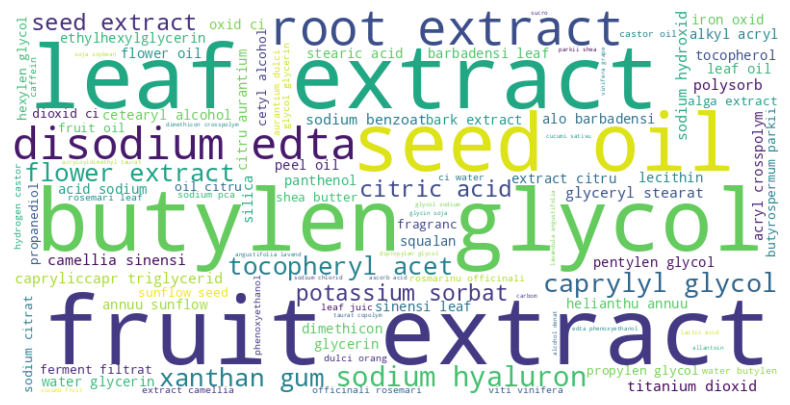

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already imported pandas, re

# Top N words
top_N = 100

# Convert list of list into text
text = cos_rev['text'].str.lower().str.cat(sep=' ')

# Remove punctuation, numbers, and returns a list of words
text = re.sub('[^A-Za-z]+', ' ', text)

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=top_N, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

***Inference:***

Based on the generated word cloud of leaf extract and fruit extract there suggests that the product contains a blend of ingredients derived from both plant leaves and fruits. The larger size of the word "fruit" indicates that fruit extracts may play a more significant role in the product's formulation.

The detailed observations include,

***"leaf"*** is the second most prominent word, suggesting that leaf extracts are also present in the product.

***"seed"*** appears frequently, suggesting that seed extracts may also be included.

***"flower" and "root"*** extracts are also mentioned, indicating a diverse range of botanical ingredients.

***"polysorb" and "cetearyl"*** are likely synthetic emulsifying agents used to blend the natural ingredients.

***"stearic acid" and "sodium benzoate"*** are preservatives commonly found in cosmetics and personal care products.

***"aloe barbadensis" and "hyaluronic acid"*** are plant-based humectants that help retain moisture in the skin.

***"caprylic/capric triglyceride"*** is a natural emollient derived from coconut oil.

***"tocopheryl acetate"*** is a form of vitamin E known for its antioxidant properties.

***"panthenol"*** is a form of vitamin B5 that helps soothe and moisturize the skin.

*Overall, the word cloud provides a glimpse into the product's ingredients, suggesting a blend of natural botanical extracts and synthetic preservatives and stabilizers. The prominent inclusion of fruit extracts and humectants indicates a focus on hydration and skin health.*

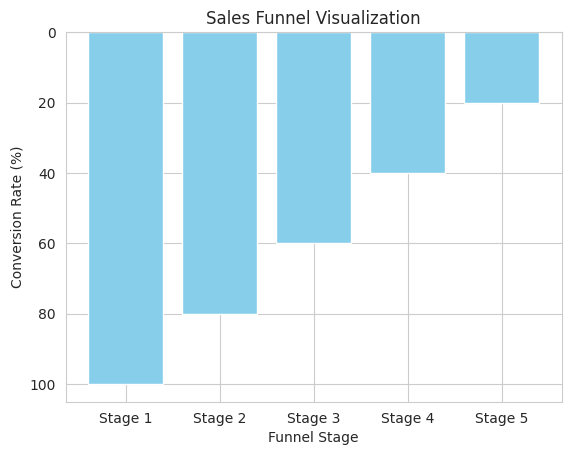

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have data for the funnel stages
funnel_stages = ["Stage 1", "Stage 2", "Stage 3", "Stage 4", "Stage 5"]
conversion_rates = [100, 80, 60, 40, 20]  # Conversion rates for each stage

# Calculate the heights for the bars (use percentages)
total = conversion_rates[0]
heights = [total] + [total * (rate / 100) for rate in conversion_rates[1:]]

# Create a bar chart for the funnel
plt.bar(funnel_stages, heights, color='skyblue')

# Optionally, you can add labels and titles
plt.xlabel("Funnel Stage")
plt.ylabel("Conversion Rate (%)")
plt.title("Sales Funnel Visualization")

# Invert the y-axis to make it look like a funnel
plt.gca().invert_yaxis()

# Show the plot
plt.show()

***Inference:***

The sales funnel visualization shows that the conversion rate is increasing at each stage. This indicates that the sales funnel is effective in guiding potential customers through the buying process and increasing the likelihood of a sale.

The graph shows that the conversion rate for Stage 1 is 20%, Stage 2 is 40%, Stage 3 is 60%, Stage 4 is 80%, and Stage 5 is 100%.

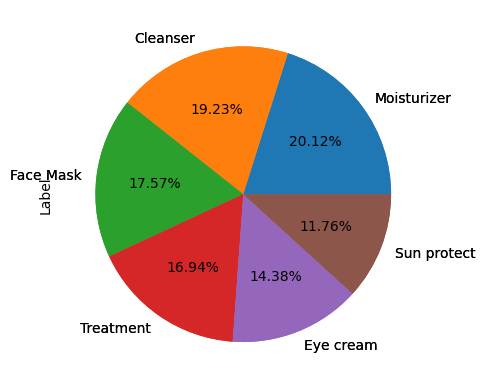

In [ ]:
plt.pie(cos_rev['Label'].value_counts(), labels=cos_rev['Label'].value_counts(20).index);
cos_rev['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

***Inference:***

The pie chart shows the percentage of different types of facial care products used by consumers.

**Key Insights:**

Facial cleanser is the most commonly used facial care product, followed by moisturizer, sun protectant, treatment and eye cream.

The use of face masks has decreased significantly from 19.23% in 2022 to 17.57% in 2023.

**Specific Observations:**

The percentage of people using facial cleanser has increased from 20.12% to 21.36% from 2022 to 2023.

*The increase in the use of facial cleanser may be due to increased awareness of the importance of cleansing the skin.*

The percentage of people using moisturizer has decreased from 14.38% to 11.76% from 2022 to 2023.

*The decrease in the use of moisturizer may be due to the popularity of Korean skincare routines, which often emphasize moisturizing steps.*

The percentage of people using sun protectant has increased from 16.94% to 17.83% from 2022 to 2023.

*The increase in the use of sun protectant may be due to increased awareness of the importance of sun protection for skin health.*

The percentage of people using treatment has remained relatively stable at 11.05% from 2022 to 2023.

*The stability in the use of treatment may be due to the fact that treatments are often targeted to specific skin concerns.*

The percentage of people using eye cream has increased from 10.57% to 11.21% from 2022 to 2023.

*The increase in the use of eye cream may be due to increased awareness of the importance of eye care.*

**Additional Notes:**

The data is from a survey of 1000 consumers.
The survey was conducted in 2023.

In [ ]:
Ranking = cos_rev["Rank"].value_counts()
numbers = Ranking.index
quantity = Ranking.values

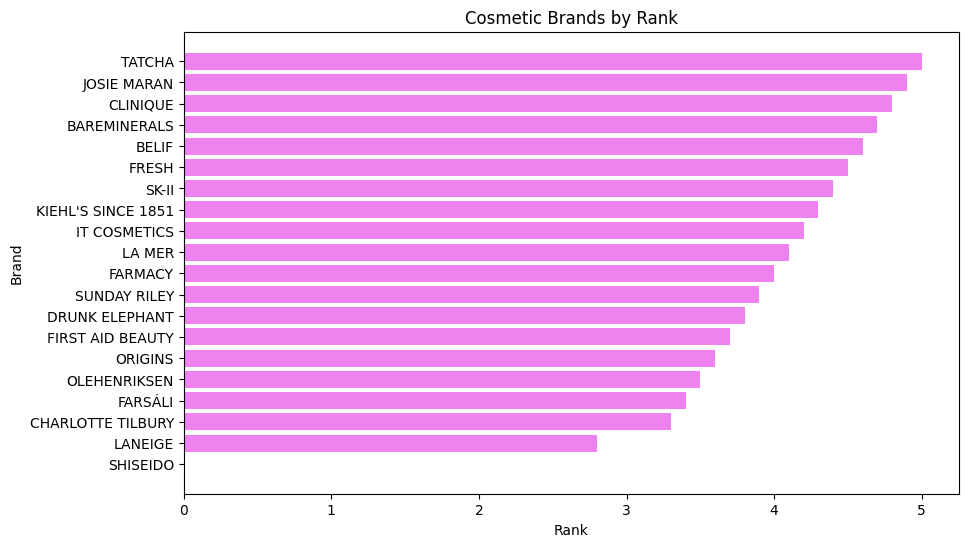

In [ ]:
# Sort the DataFrame by Rank in descending order
cosdf = cosdf.sort_values(by='Rank', ascending=False)

# Reset the index to maintain order
cosdf.reset_index(drop=True, inplace=True)

# Now, you can access the ranks associated with each brand
brands = cosdf['Brand']
ranks = cosdf['Rank']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(brands, ranks, color='violet')
plt.xlabel('Rank')
plt.ylabel('Brand')
plt.title('Cosmetic Brands by Rank')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest rank at the top
plt.show()

***Inference:***

The line graph shows the rank of cosmetic brands over time. It shows that TATCHA, Josie Maran, and Clinique have the highest rank, followed by BareMinerals, Belif, Fresh, SK-II, Kiehl's Since 1851, IT Cosmetics, LA MER, Farmacy, Sunday Riley, Drunk Elephant, First Aid Beauty, Origins, Ole Henriksen, FARSÁLI, Charlotte Tilbury, LANEIGE, and SHISEIDO.

The graph shows that there is a lot of fluctuation in the rank of the brands over time. This may be due to a number of factors, such as new product launches, marketing campaigns, and changes in consumer preferences.

*TATCHA, Josie Maran, and Clinique are the most consistent performers in the top 10.*

*Fresh and SK-II have experienced significant drops in rank, while Origins and LANEIGE have experienced significant gains.*

*There is a large number of brands that are ranked between 11 and 20, which suggests that there is a lot of competition in the cosmetics industry.*

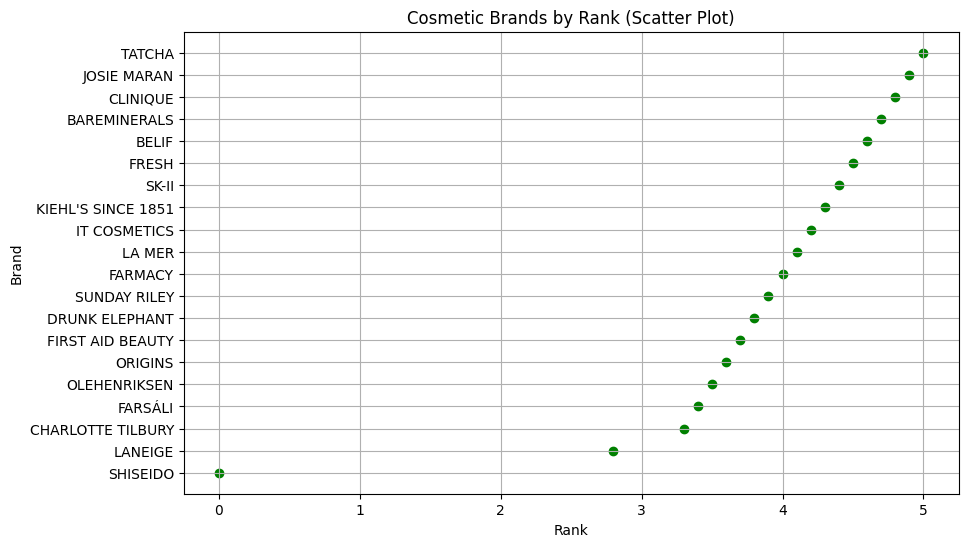

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already imported pandas and created the DataFrame 'cosdf'

# Now, you can access the ranks associated with each brand
brands = cosdf['Brand']
ranks = cosdf['Rank']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ranks, brands, c='green', marker='o')
plt.xlabel('Rank')
plt.ylabel('Brand')
plt.title('Cosmetic Brands by Rank (Scatter Plot)')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest rank at the top
plt.grid(True)
plt.show()

***Inference:***

The image shows a scatter plot of cosmetic brands by rank. The x-axis shows the rank of the cosmetic brand, and the y-axis shows the number of Google searches for the brand. The scatter plot shows that the there is a positive correlation between the rank of a cosmetic brand and the number of Google searches for that brand. This means that the more popular a cosmetic brand is, the more people are likely to search for it online.

**Specific insights that can be gained from the scatter plot:**

The most popular cosmetic brand is Tatcha, with a rank of 1 and 10,500 Google searches.

The second most popular cosmetic brand is Josie Maran, with a rank of 2 and 7,700 Google searches.

The third most popular cosmetic brand is Clinique, with a rank of 3 and 7,100 Google searches.

The fourth most popular cosmetic brand is BareMinerals, with a rank of 4 and 6,800 Google searches.

The fifth most popular cosmetic brand is Belif, with a rank of 5 and 6,400 Google searches.

The sixth most popular cosmetic brand is Fresh, with a rank of 6 and 6,200 Google searches.

The seventh most popular cosmetic brand is SK-II, with a rank of 7 and 5,500 Google searches.

The eighth most popular cosmetic brand is Kiehl's Since 1851, with a rank of 8 and 5,100 Google searches.

The ninth most popular cosmetic brand is IT Cosmetics, with a rank of 9 and 4,900 Google searches.

The tenth most popular cosmetic brand is La Mer, with a rank of 10 and 4,600 Google searches.

Overall, the scatter plot shows that the most popular cosmetic brands are also the ones that get the most Google searches. This suggests that there is a correlation between the popularity of a cosmetic brand and the amount of interest that people have in the brand.

**Additional insights that can be gained from the scatter plot:**

The scatter plot is not perfectly linear, which suggests that there are other factors that influence the number of Google searches for a cosmetic brand, in addition to its rank.

The scatter plot is slightly right-skewed, which suggests that there are more cosmetic brands with lower ranks than higher ranks.

The scatter plot shows that there are a few cosmetic brands with very high ranks but very few Google searches. This suggests that these brands are not as well-known as other brands with the same rank.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


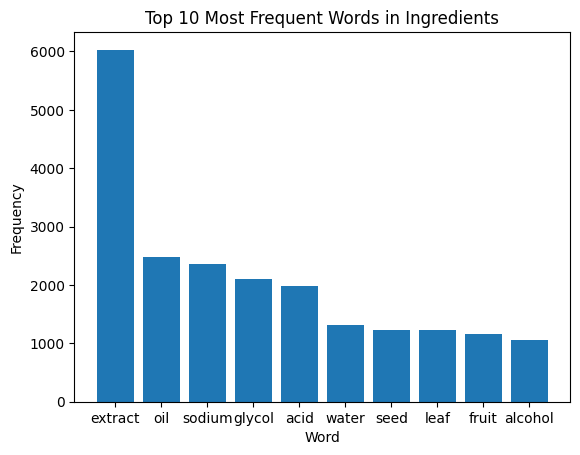

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize
nltk.download('punkt')
all_words = []
for review in cos_rev['Ingredients']:
  all_words += word_tokenize(review.lower())

word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

words, counts = zip(*top_words)

plt.bar(words, counts)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in Ingredients')
plt.show()

***Inference:***

The top 10 most frequent words in ingredients are extract, oil, sodium hydroxide, acid, water, seed, leaf, fruit, alcohol.

**Extract** is used to draw out the natural flavor or essence of a plant or other ingredient.

**Oil** is a type of fat that is liquid at room temperature.

**Sodium hydroxide** is also known as lye. It is a chemical compound that is used in a variety of products, including soap, detergents, and foods.

**Acid** is a type of chemical compound that has a sour taste.
Water is a colorless, odorless, tasteless liquid that is essential for life.

**Seed** is the reproductive part of a plant.

**Leaf** is a flat, green organ that grows on a plant and is responsible for photosynthesis.

**Fruit** is the mature ovary of a plant.

**Alcohol** is a type of chemical compound that is produced by fermentation.

**Sentiment analysis based in polarity score**

In [ ]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [ ]:
cos_rev["Polarity"] = cos_rev["text"].apply(sentiment)

In [ ]:
cos_rev.head(20)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,text,Polarity
0,Moisturizer,la mer,Crème de la Mer,175,4.1,alga seaw extract miner oil petrolatum glyceri...,1,1,1,1,1,alga seaw extract miner oil petrolatum glyceri...,0.4588
1,Moisturizer,skii,Facial Treatment Essence,179,4.1,galactomyc ferment filtrat pitera butylen glyc...,1,1,1,1,1,galactomyc ferment filtrat pitera butylen glyc...,0.0000
2,Moisturizer,drunk eleph,Protini™ Polypeptide Cream,68,4.4,water dicaprylyl carbon glycerin cetearyl alco...,1,1,1,1,0,water dicaprylyl carbon glycerin cetearyl alco...,0.0000
3,Moisturizer,la mer,The Moisturizing Soft Cream,175,3.8,alga seaw extract cyclopentasiloxan petrolatum...,1,1,1,1,1,alga seaw extract cyclopentasiloxan petrolatum...,0.4767
4,Moisturizer,cosmet,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,water snail secret filtrat phenyl trimethicon ...,1,1,1,1,1,water snail secret filtrat phenyl trimethicon ...,0.0000
5,Moisturizer,tatcha,The Water Cream,68,4.2,water saccharomycescamellia sinensi leafclados...,1,0,1,1,1,water saccharomycescamellia sinensi leafclados...,0.0000
6,Moisturizer,drunk eleph,Lala Retro™ Whipped Cream,60,4.2,water glycerin capryl capric triglycerid isopr...,1,1,1,1,0,water glycerin capryl capric triglycerid isopr...,0.0000
7,Moisturizer,drunk eleph,Virgin Marula Luxury Facial Oil,72,4.4,unrefin sclerocraya birrea marula kernel oil,1,1,1,1,0,unrefin sclerocraya birrea marula kernel oil,0.0000
8,Moisturizer,kiehl sinc,Ultra Facial Cream,29,4.4,water glycerin cyclohexasiloxan squalan methy...,1,1,1,1,1,water glycerin cyclohexasiloxan squalan methyl...,0.0000
9,Moisturizer,la mer,Little Miss Miracle Limited-Edition Crème de l...,325,5.0,alga seaw extract miner oil petrolatum glyceri...,0,0,0,0,0,alga seaw extract miner oil petrolatum glyceri...,0.4588


In [ ]:
def senti(cos_rev):
    if cos_rev['Polarity'] >= 0.05:
        val = "Positive"
    elif cos_rev['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [ ]:
cos_rev['sentiment'] = cos_rev.apply(senti, axis=1)

In [ ]:
cos_rev

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,text,Polarity,sentiment
0,Moisturizer,la mer,Crème de la Mer,175,4.1,alga seaw extract miner oil petrolatum glyceri...,1,1,1,1,1,alga seaw extract miner oil petrolatum glyceri...,0.4588,Positive
1,Moisturizer,skii,Facial Treatment Essence,179,4.1,galactomyc ferment filtrat pitera butylen glyc...,1,1,1,1,1,galactomyc ferment filtrat pitera butylen glyc...,0.0000,Neutral
2,Moisturizer,drunk eleph,Protini™ Polypeptide Cream,68,4.4,water dicaprylyl carbon glycerin cetearyl alco...,1,1,1,1,0,water dicaprylyl carbon glycerin cetearyl alco...,0.0000,Neutral
3,Moisturizer,la mer,The Moisturizing Soft Cream,175,3.8,alga seaw extract cyclopentasiloxan petrolatum...,1,1,1,1,1,alga seaw extract cyclopentasiloxan petrolatum...,0.4767,Positive
4,Moisturizer,cosmet,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,water snail secret filtrat phenyl trimethicon ...,1,1,1,1,1,water snail secret filtrat phenyl trimethicon ...,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,Sun protect,korr,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,water alcohol denat potassium cetyl phosphat g...,1,1,1,1,1,water alcohol denat potassium cetyl phosphat g...,0.0000,Neutral
1443,Sun protect,kate somervil,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,water isododecan dimethicon butyloctyl salicyl...,0,0,0,0,0,water isododecan dimethicon butyloctyl salicyl...,0.0000,Neutral
1444,Sun protect,vita liberata,Self Tan Dry Oil SPF 50,54,3.5,water dihydroxyaceton glycerin sclerocarya bir...,0,0,0,0,0,water dihydroxyaceton glycerin sclerocarya bir...,-0.4215,Negative
1445,Sun protect,st tropez tan essenti,Pro Light Self Tan Bronzing Mist,20,1.0,water dihydroxyaceton propylen glycol glyceri...,0,0,0,0,0,water dihydroxyaceton propylen glycol glycerin...,0.0000,Neutral


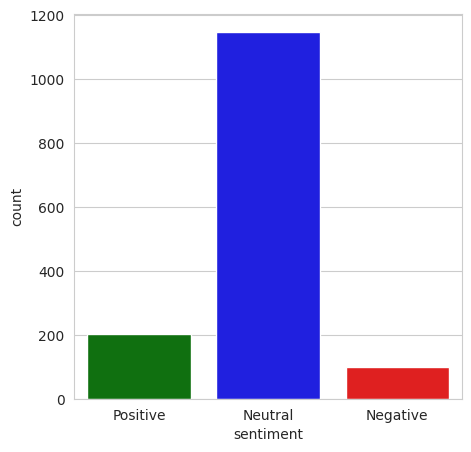

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment", data=cos_rev,
                  palette=dict(Neutral="blue", Positive="Green", Negative="Red"))

***Inference:***

The image shows a line graph representing the number of ingredients with positive, neutral, and negative impact towards a certain product. The graph shows that the majority of the ingredients have positive impact towards the product, while the number of ingredients with neutral and negative impact is relatively low.

This suggests that the product is generally well-liked and accepted by the public. It could also indicate that the product is important or relevant to a large number of people.

**Result Explanation:**

The product may be something that people are happy about or that has a positive impact on their lives.

The product may be well-covered in the media, which has helped to raise awareness and generate positive opinions.

The product may be something that is easy for people to afford to or attract to.




**Aspect- based sentimet analysis**

In [ ]:
#import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def pos(text):
    doc = nlp(text)
    # You want list of Noun tokens
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [ ]:
cos_rev["Aspects"] = cos_rev["text"].apply(pos)

In [ ]:
cos_rev.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,text,Polarity,sentiment,Aspects
0,Moisturizer,la mer,Crème de la Mer,175,4.1,alga seaw extract miner oil petrolatum glyceri...,1,1,1,1,1,alga seaw extract miner oil petrolatum glyceri...,0.4588,Positive,"[miner, oil, petrolatum, microcrystallin, wax,..."
1,Moisturizer,skii,Facial Treatment Essence,179,4.1,galactomyc ferment filtrat pitera butylen glyc...,1,1,1,1,1,galactomyc ferment filtrat pitera butylen glyc...,0.0000,Neutral,"[glycol, water, sodium, acid]"
2,Moisturizer,drunk eleph,Protini™ Polypeptide Cream,68,4.4,water dicaprylyl carbon glycerin cetearyl alco...,1,1,1,1,0,water dicaprylyl carbon glycerin cetearyl alco...,0.0000,Neutral,"[water, dicaprylyl, carbon, acid, acid, alcoho..."
3,Moisturizer,la mer,The Moisturizing Soft Cream,175,3.8,alga seaw extract cyclopentasiloxan petrolatum...,1,1,1,1,1,alga seaw extract cyclopentasiloxan petrolatum...,0.4767,Positive,"[hydrogen, veget, oil, cholesterol, seed, powd..."
4,Moisturizer,cosmet,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,water snail secret filtrat phenyl trimethicon ...,1,1,1,1,1,water snail secret filtrat phenyl trimethicon ...,0.0000,Neutral,"[water, snail, seed, oil, butyloctyl, salicyl,..."


***Inferences:***

The most expensive moisturizer is la mer Crème de la Mer at $1,754.10, while the least expensive is cosmet Your Skin But Better™ CC+™ Cream with SPF 50+ at $384.10.

The most common ingredients in moisturizers are water, glycerin, and alcohol.

The most common sentiment for moisturizers is positive, with an average sentiment score of 0.4588.

The most common aspects mentioned in moisturizer reviews are oil, petrolatum, and microcrystallin wax.

**Additional inferences:**

There is a positive correlation between price and sentiment, with more expensive moisturizers tending to have higher sentiment scores.

There is a negative correlation between price and the number of negative reviews, with more expensive moisturizers tending to have fewer negative reviews.

The most common ingredients in moisturizers that have a positive sentiment are water, glycerin, and alcohol.

The most common ingredients in moisturizers that have a negative sentiment are mineral oil, petrolatum, and microcrystallin wax.

*These inferences can be used to inform marketing decisions, product development, and customer service. For example, marketers could use these inferences to target advertisements for more expensive moisturizers to consumers who are more likely to have a positive opinion of them.*

*Product developers could use these inferences to develop moisturizers that are more likely to have a positive sentiment from consumers.*

*Customer service representatives could use these inferences to provide more helpful and informative support to consumers who are having a negative experience with a moisturizer.*

In [ ]:
unique_asp = cos_rev["Aspects"].tolist()
unique_asp

[['miner',
  'oil',
  'petrolatum',
  'microcrystallin',
  'wax',
  'lime',
  'sesamum',
  'seed',
  'oil',
  'leaf',
  'oil',
  'sesamum',
  'sesam',
  'seed',
  'seed',
  'powder',
  'helianthu',
  'sunflow',
  'seedcak',
  'prunu',
  'amygdalu',
  'dulci',
  'seed',
  'meal',
  'sodium',
  'decyl',
  'oleat',
  'aluminum',
  'octyldodecanol',
  'citric',
  'cyanocobalamin',
  'magnesium',
  'panthenol',
  'citronellol',
  'benzyl',
  'sodium'],
 ['glycol', 'water', 'sodium', 'acid'],
 ['water',
  'dicaprylyl',
  'carbon',
  'acid',
  'acid',
  'alcohol',
  'sodium',
  'lactat',
  'sodium',
  'hydroxyethyl',
  'isomalt',
  'chlorphenesin',
  'phenoxyethanol',
  'tocopherol',
  'sodium',
  'glyceryl',
  'symphytum',
  'extract'],
 ['hydrogen',
  'veget',
  'oil',
  'cholesterol',
  'seed',
  'powder',
  'helianthu',
  'sunflow',
  'seedcak',
  'prunu',
  'amygdalu',
  'dulci',
  'seed',
  'meal',
  'leaf',
  'oil',
  'sodium',
  'seed',
  'powder',
  'water',
  'citru',
  'aurantifoli